# Analyse du Bonheur dans le monde

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulation
from matplotlib import pyplot as plt # Data visualization
import seaborn as sns         # Data visualization
import scipy.stats as stats
import chart_studio.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
data2019 = pd.read_csv("dataSet/2019.csv") # Lire le dataset
data2019.describe() # Bref résumer

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [3]:
data2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [4]:
data2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:>

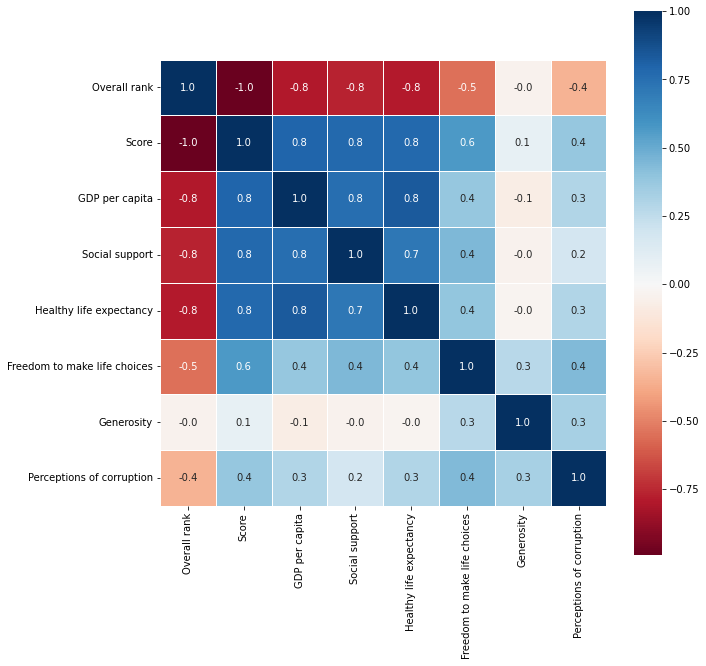

In [28]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data2019.corr(),
            annot=True,
            linewidths=1,
            cmap="RdBu",
            center=0,
            fmt=".1f",
            square=True
           )

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

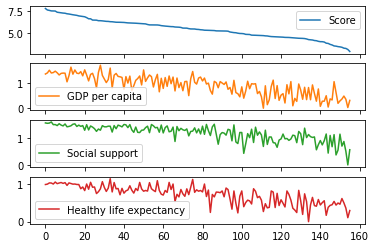

In [6]:
data_plot = data2019[["Score","GDP per capita", "Social support", "Healthy life expectancy"]]
data_plot.plot(subplots=True)

<AxesSubplot:>

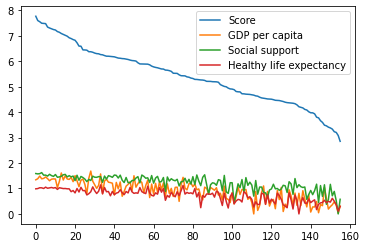

In [7]:
data_plot.plot()

<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

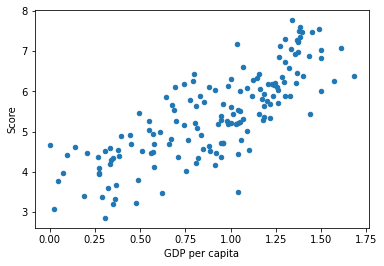

In [8]:
data_plot.plot(kind = "scatter", x = "GDP per capita", y = "Score")

## Carte du monde du bonheur 

In [9]:
location = pd.read_csv("dataSet/concap.csv") # Lire le dataset

In [10]:
location.dtypes

CountryName          object
CapitalName          object
CapitalLatitude     float64
CapitalLongitude    float64
CountryCode          object
ContinentName        object
dtype: object

In [11]:
data_new = pd.merge(location[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
data2019,left_on='CountryName',right_on='Country or region')

In [12]:
happiness_score = data_new['Score'].astype(float)

In [43]:
data = [dict(
        type='choropleth',
        colorscale = 'Rainbow',
        locations = data_new['CountryName'],
        z = happiness_score,
        locationmode = 'country names',
        text = data_new['Country or region'],
        colorbar = dict(
        title = 'Score du Bonheur', 
        titlefont=dict(size=25),
        tickfont=dict(size=18))
)]
layout = dict(
    title = 'Score du Bonheur',
    titlefont = dict(size=40),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data, layout = layout)
iplot(choromap, validate=False)

## Classement pays en fonction du bonheur 

Text(0.5, 1.0, 'Score du bonheur 10 premiers pays')

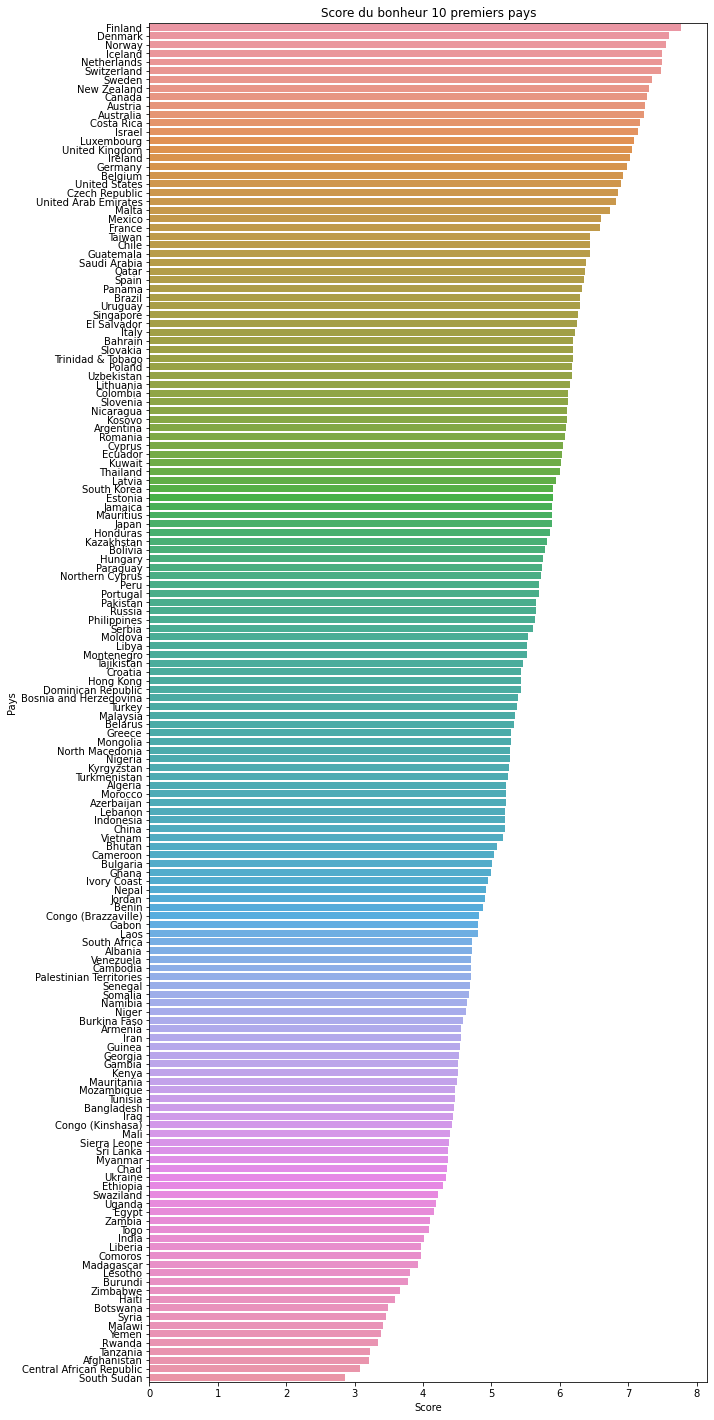

In [46]:
plt.figure(figsize=(10,25))
sns.barplot(x=data2019['Score'], y= data2019['Country or region'])
plt.xlabel('Score')
plt.ylabel('Pays')
plt.title('Score du bonheur 10 premiers pays')

Text(0.5, 1.0, 'Score du bonheur 10 premiers pays')

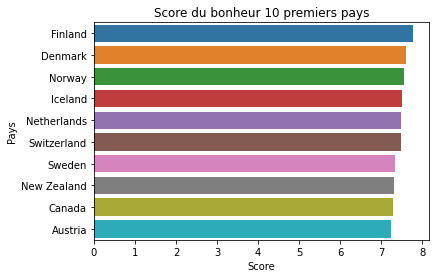

In [41]:
sns.barplot(x=data2019['Score'], y= data2019['Country or region'][:10])
plt.xlabel('Score')
plt.ylabel('Pays')
plt.title('Score du bonheur 10 premiers pays')

Text(0.5, 1.0, 'Score du bonheur 10 derniers pays')

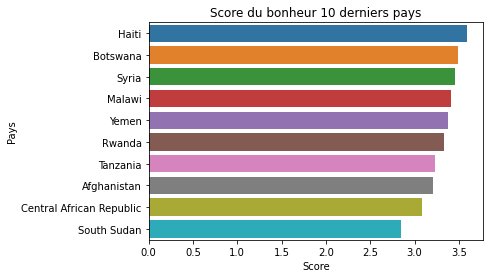

In [42]:
sns.barplot(x=data2019['Score'], y= data2019['Country or region'][-10:])
plt.xlabel('Score')
plt.ylabel('Pays')
plt.title('Score du bonheur 10 derniers pays')

## Classement des pays en fonction de l'économie

In [15]:
economie2019 = data2019.sort_values(by=['GDP per capita'], ascending = False)

Text(0.5, 1.0, 'Classement PIB par habitant par pays')

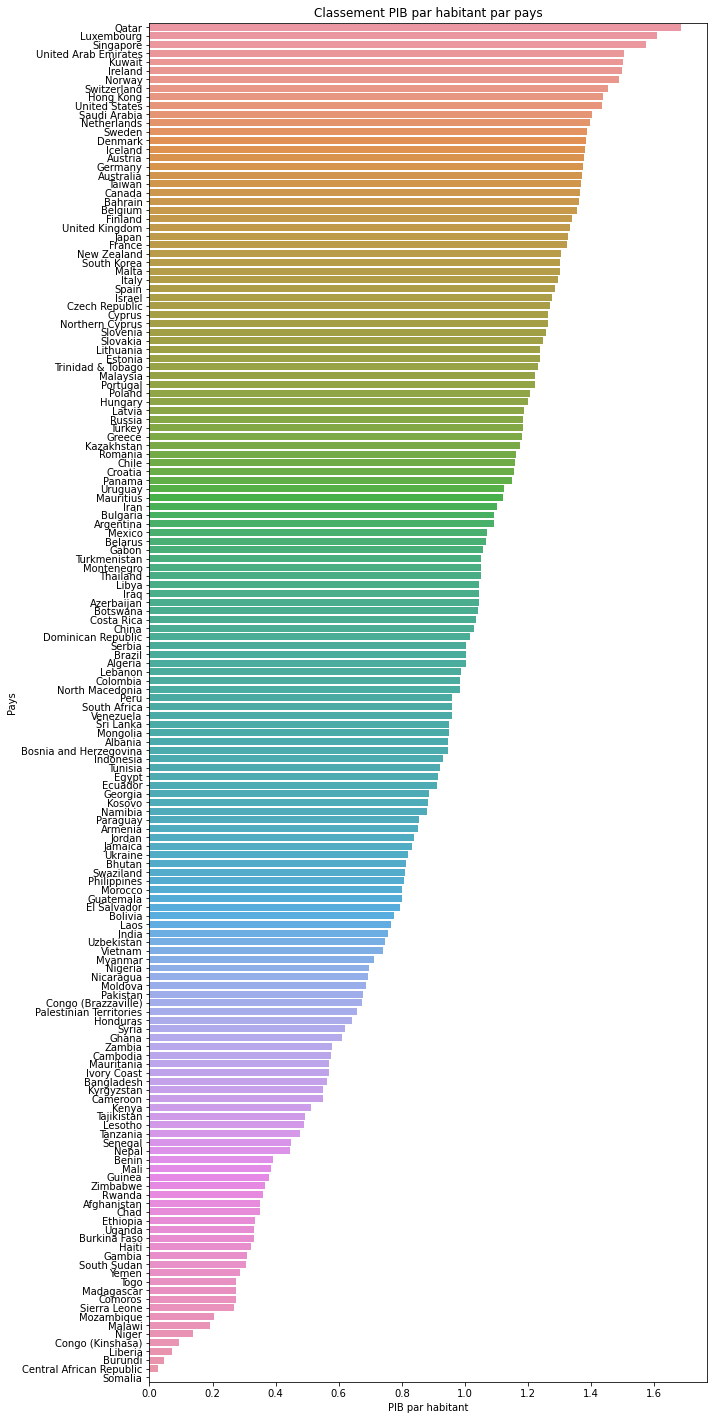

In [16]:
plt.figure(figsize=(10,25))
sns.barplot(x=economie2019['GDP per capita'], y=economie2019['Country or region'])
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Classement PIB par habitant par pays')

Text(0.5, 1.0, 'Classement PIB par habitant des 10 premiers pays')

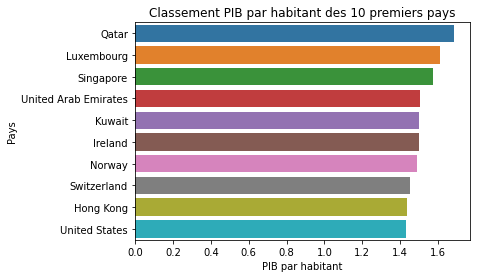

In [47]:
sns.barplot(x=economie2019['GDP per capita'], y=economie2019['Country or region'][:10])
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Classement PIB par habitant des 10 premiers pays')

Text(0.5, 1.0, 'Classement PIB par habitant des 10 derniers pays')

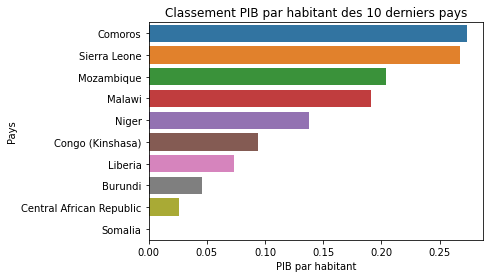

In [50]:
sns.barplot(x=economie2019['GDP per capita'], y=economie2019['Country or region'][-10:])
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Classement PIB par habitant des 10 derniers pays')

## Classement pays en fonction de l'esperance de vie

In [17]:
life2019 = data2019.sort_values(by=['Healthy life expectancy'], ascending = False)

Text(0.5, 1.0, 'Classement esperance de vie par pays')

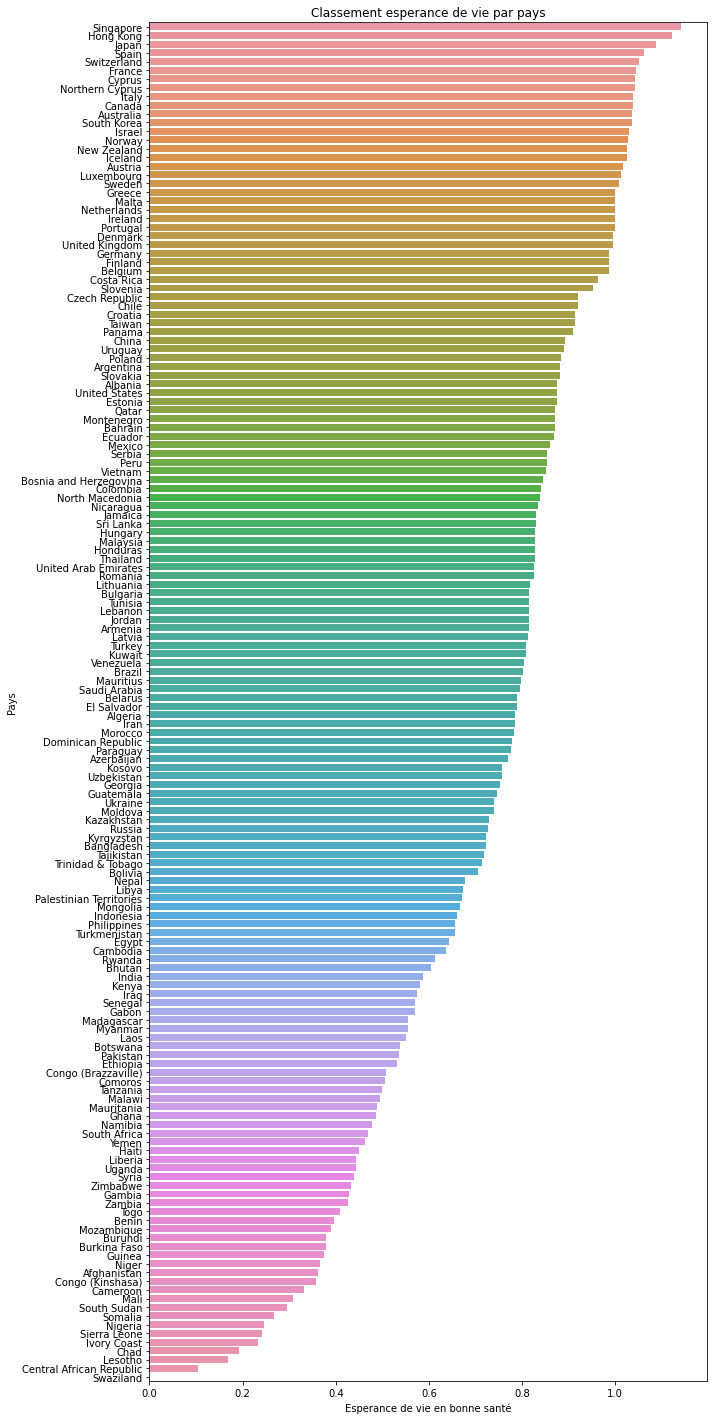

In [18]:
plt.figure(figsize=(10,25))
sns.barplot(x=life2019['Healthy life expectancy'], y=life2019['Country or region'])
plt.xlabel('Esperance de vie en bonne santé')
plt.ylabel('Pays')
plt.title('Classement esperance de vie par pays')

Text(0.5, 1.0, 'Classement esperance de vie des 10 premiers pays')

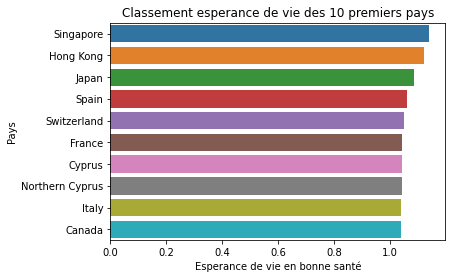

In [51]:
sns.barplot(x=life2019['Healthy life expectancy'], y=life2019['Country or region'][:10])
plt.xlabel('Esperance de vie en bonne santé')
plt.ylabel('Pays')
plt.title('Classement esperance de vie des 10 premiers pays')

Text(0.5, 1.0, 'Classement esperance de vie des 10 derniers pays')

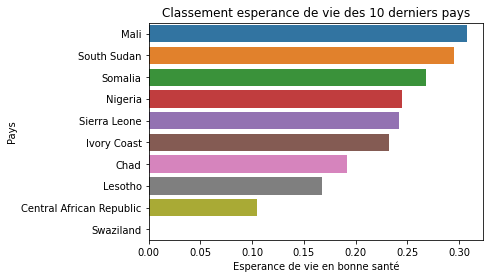

In [52]:
sns.barplot(x=life2019['Healthy life expectancy'], y=life2019['Country or region'][-10:])
plt.xlabel('Esperance de vie en bonne santé')
plt.ylabel('Pays')
plt.title('Classement esperance de vie des 10 derniers pays')

## Classement en fonction de la générosité

In [19]:
gene2019 = data2019.sort_values(by=['Generosity'], ascending = False)

Text(0.5, 1.0, 'Classement Generosité par pays')

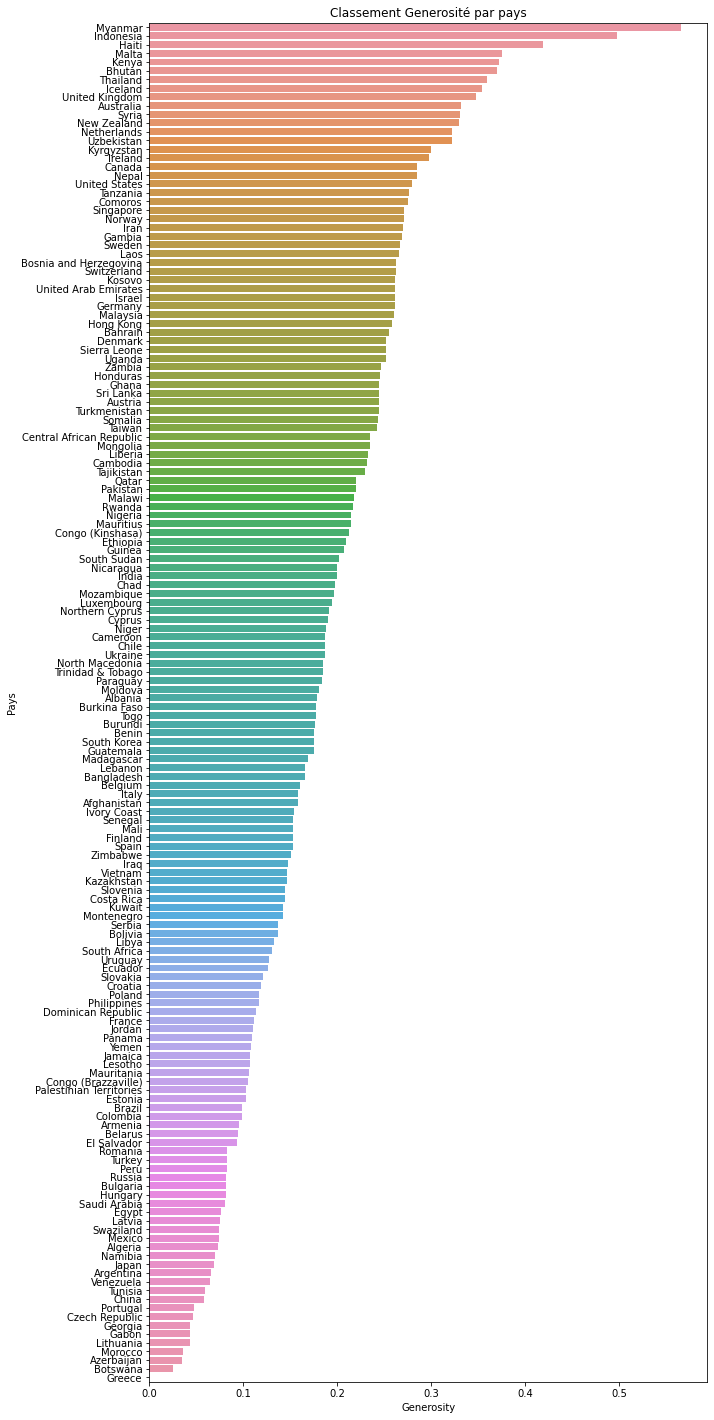

In [53]:
plt.figure(figsize=(10,25))
sns.barplot(x=gene2019['Generosity'], y=gene2019['Country or region'])
plt.xlabel('Generosity')
plt.ylabel('Pays')
plt.title('Classement Generosité par pays')

Text(0.5, 1.0, 'Classement Generosité 10 premiers pays')

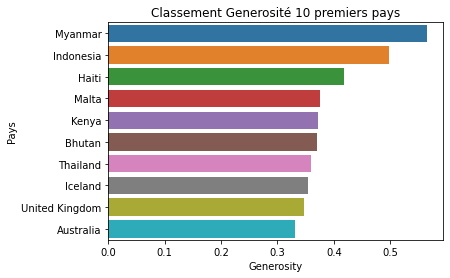

In [55]:
sns.barplot(x=gene2019['Generosity'], y=gene2019['Country or region'][:10])
plt.xlabel('Generosity')
plt.ylabel('Pays')
plt.title('Classement Generosité 10 premiers pays')

Text(0.5, 1.0, 'Classement Generosité 10 derniers pays')

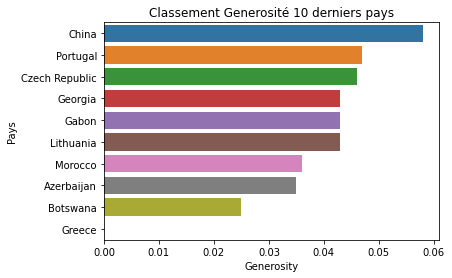

In [57]:
sns.barplot(x=gene2019['Generosity'], y=gene2019['Country or region'][-10:])
plt.xlabel('Generosity')
plt.ylabel('Pays')
plt.title('Classement Generosité 10 derniers pays')

## Classement pays en fonction de la perception de la corruption

In [21]:
corr2019 = data2019.sort_values(by=['Perceptions of corruption'], ascending = False)

Text(0.5, 1.0, 'Classement perception de la corruption par pays')

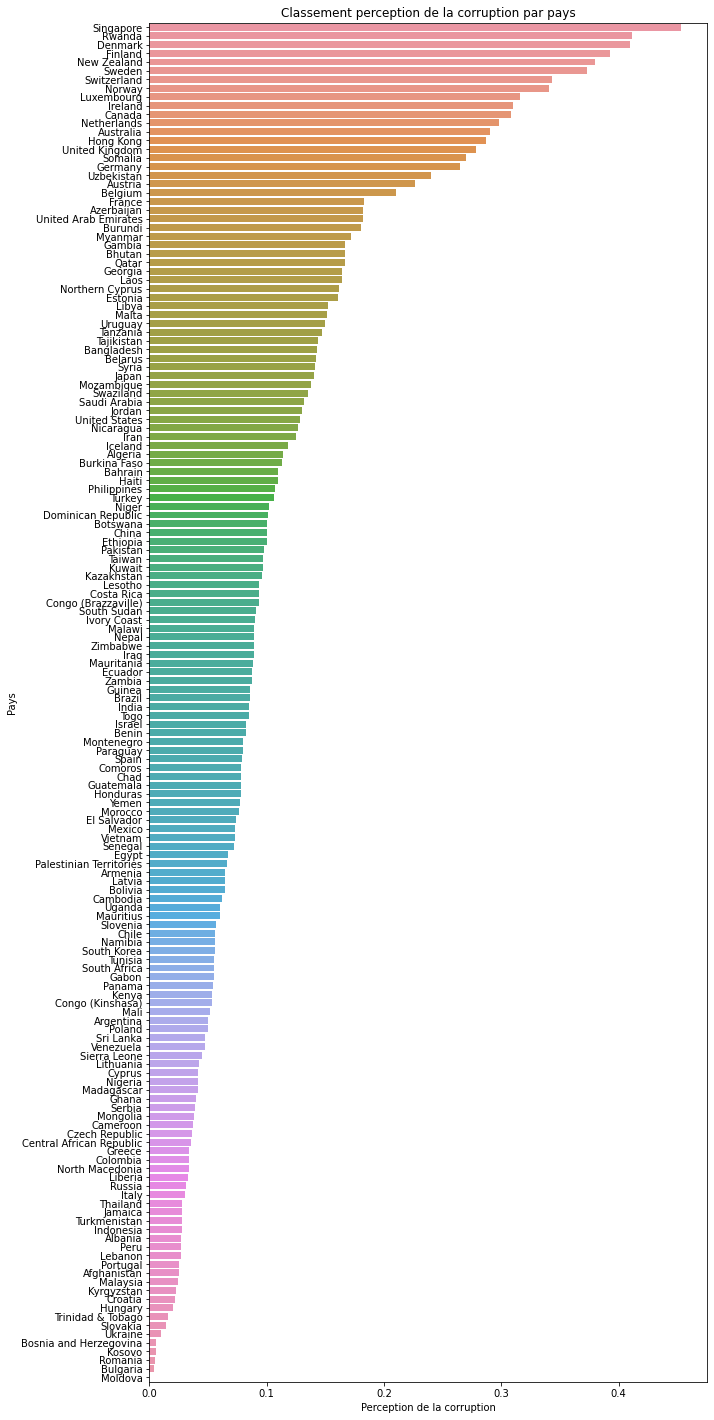

In [22]:
plt.figure(figsize=(10,25))
sns.barplot(x=corr2019['Perceptions of corruption'], y=corr2019['Country or region'])
plt.xlabel('Perception de la corruption')
plt.ylabel('Pays')
plt.title('Classement perception de la corruption par pays')

Text(0.5, 1.0, 'Classement perception 10 premiers par pays')

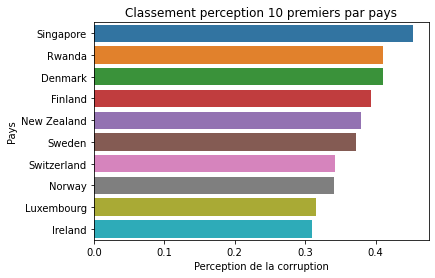

In [59]:
sns.barplot(x=corr2019['Perceptions of corruption'], y=corr2019['Country or region'][:10])
plt.xlabel('Perception de la corruption')
plt.ylabel('Pays')
plt.title('Classement perception 10 premiers par pays')

Text(0.5, 1.0, 'Classement perception de la corruption par pays')

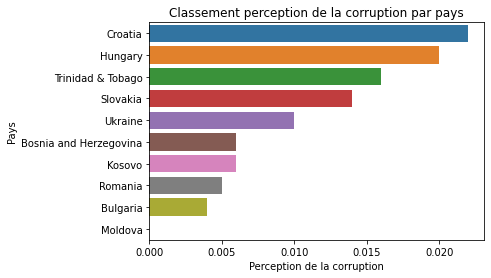

In [60]:
sns.barplot(x=corr2019['Perceptions of corruption'], y=corr2019['Country or region'][-10:])
plt.xlabel('Perception de la corruption')
plt.ylabel('Pays')
plt.title('Classement perception de la corruption par pays')

In [23]:
data2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

## Classement en fonction du support social

In [24]:
supp2019 = data2019.sort_values(by=['Social support'], ascending = False)

Text(0.5, 1.0, 'Classement du support social par pays')

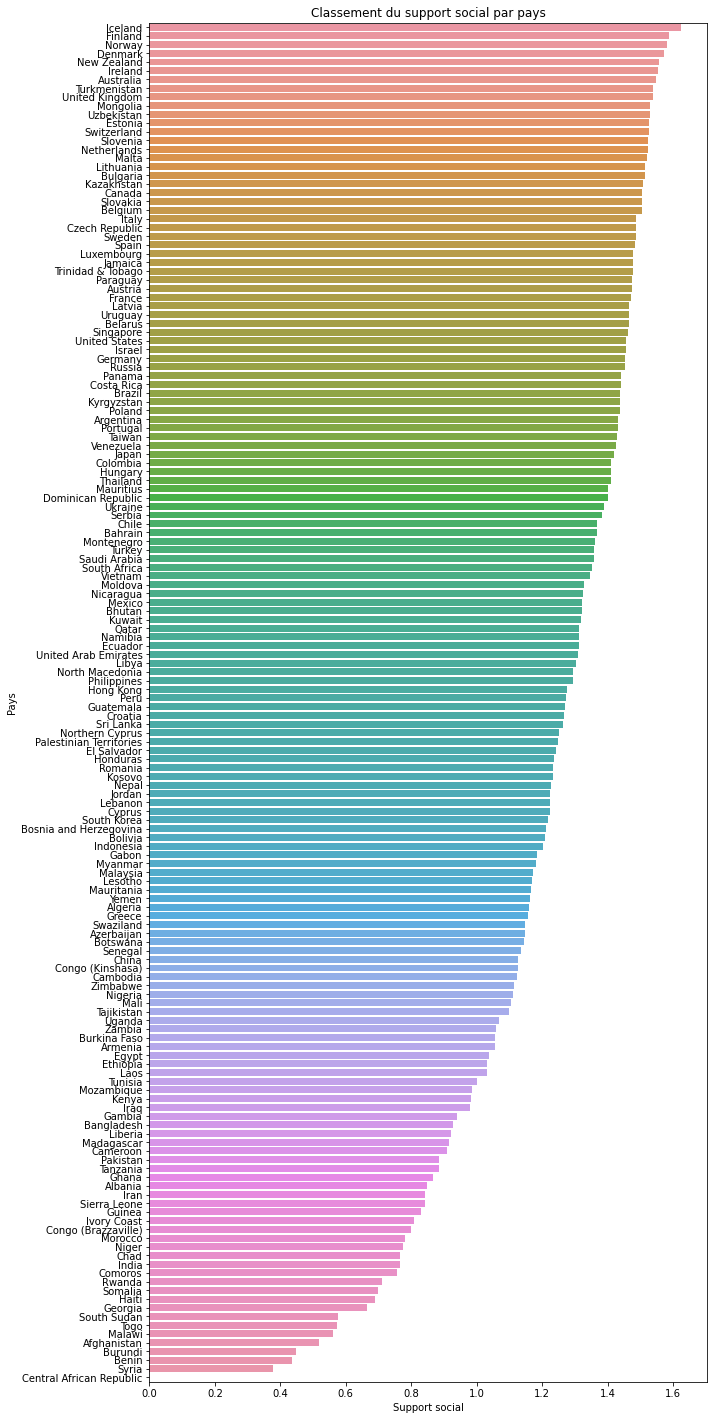

In [25]:
plt.figure(figsize=(10,25))
sns.barplot(x=supp2019['Social support'], y=supp2019['Country or region'])
plt.xlabel('Support social')
plt.ylabel('Pays')
plt.title('Classement du support social par pays')

Text(0.5, 1.0, 'Classement du support social par pays')

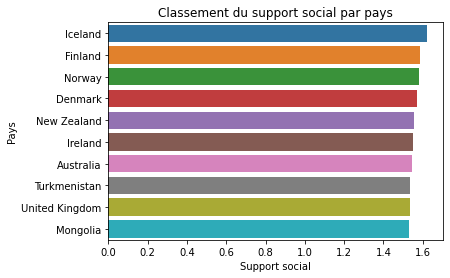

In [61]:
sns.barplot(x=supp2019['Social support'], y=supp2019['Country or region'][:10])
plt.xlabel('Support social')
plt.ylabel('Pays')
plt.title('Classement du support social des 10 premiers pays')

Text(0.5, 1.0, 'Classement du support social des 10 derniers pays')

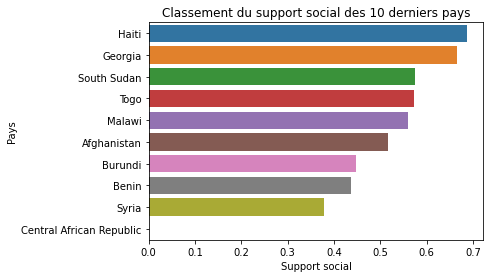

In [64]:
sns.barplot(x=supp2019['Social support'], y=supp2019['Country or region'][-10:])
plt.xlabel('Support social')
plt.ylabel('Pays')
plt.title('Classement du support social des 10 derniers pays')

## Classement de la liberté par pays  

In [26]:
free2019 = data2019.sort_values(by=['Freedom to make life choices'], ascending = False)

Text(0.5, 1.0, 'Classement de la liberté par pays')

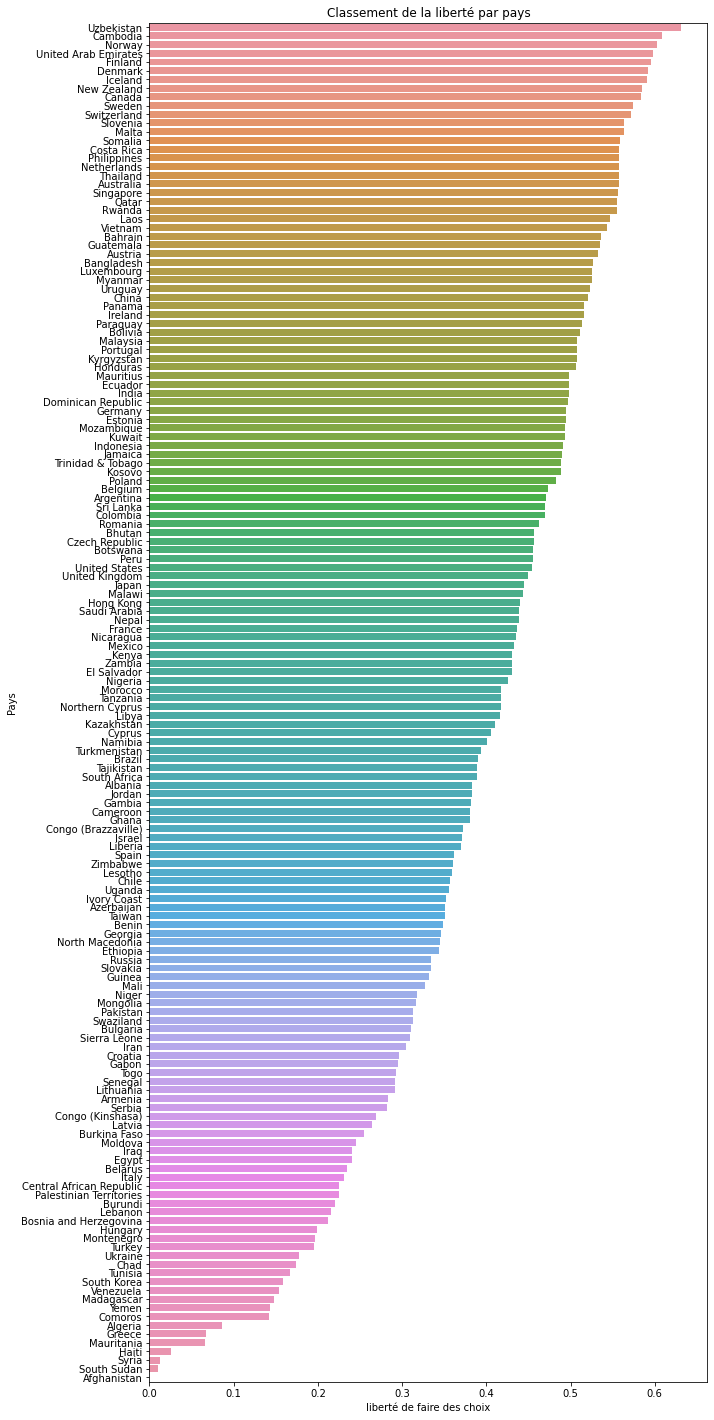

In [27]:
plt.figure(figsize=(10,25))
sns.barplot(x=free2019['Freedom to make life choices'], y=free2019['Country or region'])
plt.xlabel('liberté de faire des choix')
plt.ylabel('Pays')
plt.title('Classement de la liberté par pays')

Text(0.5, 1.0, 'Classement de la liberté des 10 premiers pays')

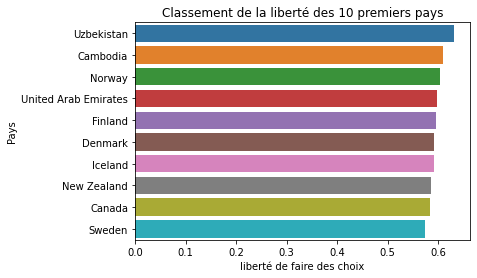

In [66]:
sns.barplot(x=free2019['Freedom to make life choices'], y=free2019['Country or region'][:10])
plt.xlabel('liberté de faire des choix')
plt.ylabel('Pays')
plt.title('Classement de la liberté des 10 premiers pays')

Text(0.5, 1.0, 'Classement de la liberté des 10 derniers pays')

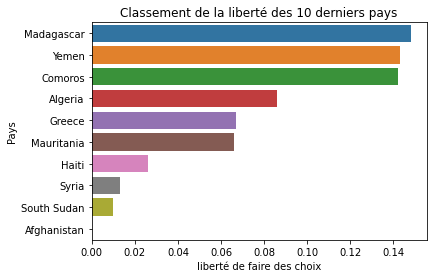

In [68]:
sns.barplot(x=free2019['Freedom to make life choices'], y=free2019['Country or region'][-10:])
plt.xlabel('liberté de faire des choix')
plt.ylabel('Pays')
plt.title('Classement de la liberté des 10 derniers pays')